# Preparação e tópicos em comum

In [1]:
### Import de bibliotecas usadas ###

#    Tratamento e manipulação de dados
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss

#    Modelos e métricas
from sklearn.ensemble import AdaBoostClassifier,\
    BaggingClassifier,\
    RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,\
    RandomizedSearchCV,\
    GridSearchCV
from sklearn.metrics import make_scorer,\
    accuracy_score,\
    precision_score,\
    recall_score,\
    f1_score,\
    confusion_matrix

#    Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#    Definição de seed para reprodutibilidade
seed = 42
np.random.seed(seed)

In [3]:
#    Configurações de plot para o projeto
%matplotlib inline
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [4]:
#    Carregamento dos dados em memória
df_heart = pd.read_csv('heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


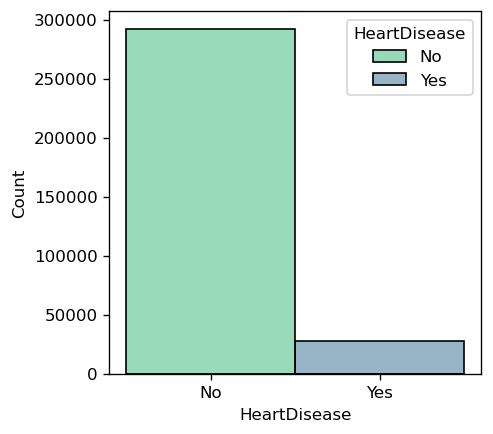

In [51]:
### Verifica a distribuição dos dados entre a classe alvo ###
img, axes = plt.subplots(1, 1, figsize=(4, 4))

sns.histplot(
    data=df_heart,
    x='HeartDisease',
    hue='HeartDisease',
    palette=sns.color_palette("viridis_r", 2)
)

plt.show()

#    Observações com dados da doença cardíaca representam
# menos de 10% do total do dataset.
#    Antes de se treinar o modelo deverá ser feito algum tipo
# de tratamento, como superamostragem da classe minoritária
# ou subamostragem da classe majoritária.

In [6]:
#     Conversão de variáveis categóricas em variáveis "dummies"
df_heart_dummies=pd.get_dummies(data=df_heart, drop_first=True)
df_heart_dummies.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [7]:
#    Escolha das colunas que serão usadas como input e
# output do modelo
target_column = ['HeartDisease_Yes']
input_columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime',
    'Smoking_Yes',
    'AlcoholDrinking_Yes',
    'Stroke_Yes',
    'DiffWalking_Yes',
    'Sex_Male',
    'AgeCategory_25-29',
    'AgeCategory_30-34',
    'AgeCategory_35-39',
    'AgeCategory_40-44',
    'AgeCategory_45-49',
    'AgeCategory_50-54',
    'AgeCategory_55-59',
    'AgeCategory_60-64',
    'AgeCategory_65-69',
    'AgeCategory_70-74',
    'AgeCategory_75-79',
    'AgeCategory_80 or older',
    'Race_Asian',
    'Race_Black',
    'Race_Hispanic',
    'Race_Other',
    'Race_White',
    'Diabetic_No, borderline diabetes',
    'Diabetic_Yes',
    'Diabetic_Yes (during pregnancy)',
    'PhysicalActivity_Yes',
    'GenHealth_Fair',
    'GenHealth_Good',
    'GenHealth_Poor',
    'GenHealth_Very good',
    'Asthma_Yes',
    'KidneyDisease_Yes',
    'SkinCancer_Yes'
 ]

In [8]:
#    Criação de variáveis "dummies"
X=df_heart_dummies.loc[:, input_columns]
y=df_heart_dummies.loc[:, target_column]

#    Uso da técnica de subamostragem para
# reduzir o número de amostras da classe
# majoritária para a mesma quantidade da
# classe minoritária
X_resampled, y_resampled = NearMiss(n_jobs=-1).\
    fit_resample(
        X,
        y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.25,
    stratify=y_resampled
)


In [58]:
#    Funcão para análise do desempenho do base_estimator
def bagging_satistics(bagging_history, X_test, y_test):
    # Resultados do treinamento
    results = bagging_history.cv_results_
    estimators_number = [x for x in results['param_n_estimators']]
    mean_cv_score = [x*100 for x in results['mean_test_score']]


    # Predições do modelo
    y_predicted = bagging_history.predict(X_test)


    # Cálculo das métricas
    metrics_dict = {
        'Confusion Matrix':confusion_matrix(y_test, y_predicted),
        'Accuracy':100*accuracy_score(y_test, y_predicted),
        'Precision':100*precision_score(y_test, y_predicted),
        'Recall':100*recall_score(y_test, y_predicted),
        'F1 Score':100*f1_score(y_test, y_predicted)
    }


    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    plt.subplots_adjust(
        left=0.1,
        bottom=0.1, 
        right=0.9, 
        top=0.9, 
        wspace=0.4, 
        hspace=0.4
    )


    # Gráfico: Performance por n_estimators
    sns.lineplot(
        x=estimators_number,
        y=mean_cv_score,
        ax=axes[0],
        palette=sns.color_palette("viridis_r")
    )

    axes[0].set_title('Variação de performance em\nfunção de n_estimators')
    axes[0].set_xlabel('Número de estimators')
    axes[0].set_ylabel('F1 Score (%)')

    plt.xticks(ticks=estimators_number, labels=estimators_number)


    # Gráfico: Matrix de confusão
    group_names = ['VN','FP','FN','VP']
    group_counts = ['{0:,d}'.format(value) for value in
                    metrics_dict['Confusion Matrix'].flatten()]
    group_perc = ['{0:.2f}'.format(100*value/metrics_dict['Confusion Matrix'].sum()) for value in
                    metrics_dict['Confusion Matrix'].flatten()]
    labels = [f'{v1}\n{v2}\n({v3}%)' for v1, v2, v3 in
            zip(group_names,group_counts, group_perc)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(
        metrics_dict['Confusion Matrix'],
        annot=labels,
        fmt='',
        cmap=sns.color_palette("YlGnBu", as_cmap=True),
        ax=axes[1]       
    )

    axes[1].set_title('Matriz de confusão para o\nmelhor classificador')
    axes[1].set_xlabel('Valores reais')
    axes[1].set_ylabel('Valores preditos')

    plt.show()

    return metrics_dict



# Classificadores _essemble_ (_Bagging_)

## _Base Estimator_: KNN

In [10]:
#    Criação do classificador KNN e definição dos
# parâmetros a serem usados no RandomizedSearch
knn = KNeighborsClassifier(n_jobs=-1)

knn_param = {
    'n_neighbors': np.arange(4, 21, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': [
        'ball_tree',
        'kd_tree',
        'brute'
    ],
    'leaf_size': np.arange(15, 61, 5),
    'p': [1, 2, 3]
}


In [11]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de KNN
knn_search = RandomizedSearchCV(
    knn,
    knn_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

knn_history = knn_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
knn_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

knn_bagging = BaggingClassifier(
    base_estimator=knn_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

knn_bagging_search = GridSearchCV(
    estimator=knn_bagging,
    param_grid=knn_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

knn_bagging_history = knn_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    4.5s remaining:    9.0s
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:    4.6s remaining:    2.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    4.6s finished


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:  2.1min remaining:  4.3min
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  2.1min remaining:  2.1min
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:  2.1min remaining:  1.1min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  2.1min finished


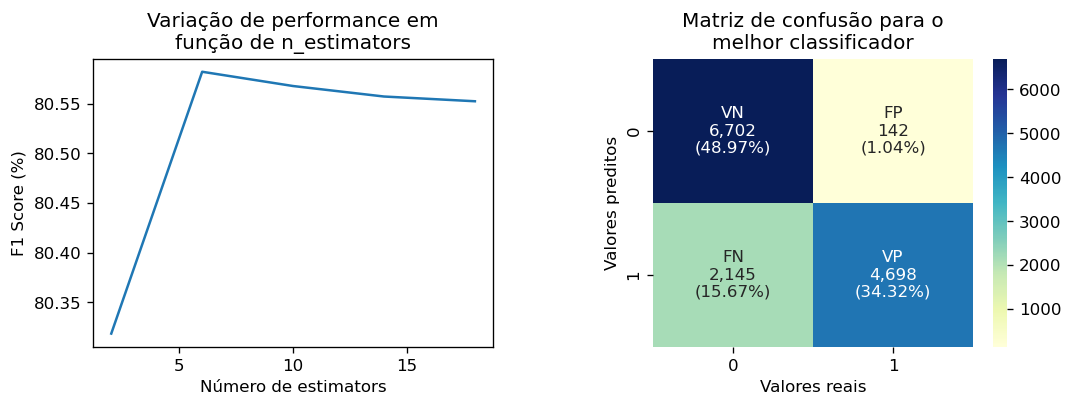

In [60]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
knn_statistics = bagging_satistics(knn_bagging_history, X_test, y_test)

## _Base Estimator_: Árvore de decisão

In [14]:
#    Criação do classificador Árvore de Decisão e definição dos
# parâmetros a serem usados no RandomizedSearch
dt = DecisionTreeClassifier()

dt_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [15]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de Árvore de Decisão
dt_search = RandomizedSearchCV(
    dt,
    dt_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

dt_history = dt_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [16]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
dt_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

dt_bagging = BaggingClassifier(
    base_estimator=dt_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

dt_bagging_search = GridSearchCV(
    estimator=dt_bagging,
    param_grid=dt_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

dt_bagging_history = dt_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


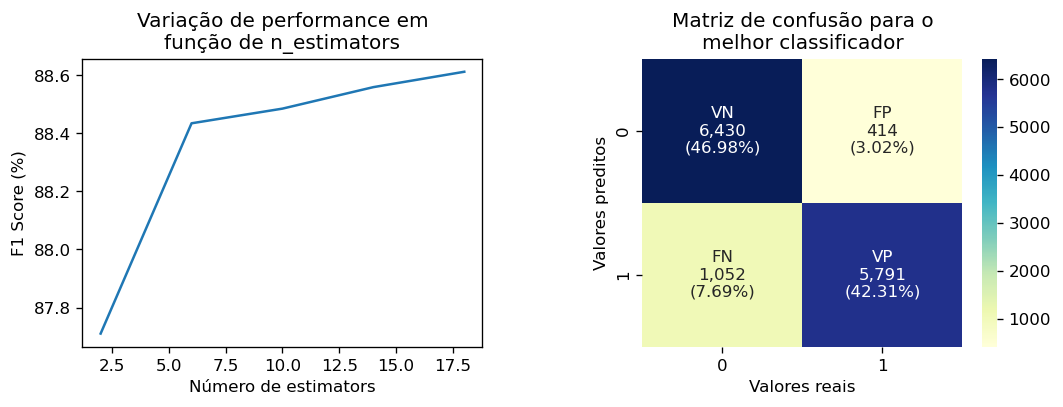

In [59]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
dt_statistics = bagging_satistics(dt_bagging_history, X_test, y_test)

## _Base Estimator_: SVM

In [18]:
#    Criação do classificador SVM e definição dos
# parâmetros a serem usados no RandomizedSearch
svc = LinearSVC(dual=False)

svc_param = {
    'penalty': ['l1', 'l2'],
    'C': np.arange(1.0, 3.1, 0.5),
}

In [19]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de SVM
svc_search = RandomizedSearchCV(
    svc,
    svc_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

svc_history = svc_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
svc_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

svc_bagging = BaggingClassifier(
    base_estimator=svc_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

svc_bagging_search = GridSearchCV(
    estimator=svc_bagging,
    param_grid=svc_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

svc_bagging_history = svc_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    4.5s remaining:   19.6s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    4.5s remaining:    7.6s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    4.8s remaining:    3.7s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.7s finished


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.5s remaining:   11.3s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    2.6s remaining:    4.5s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    2.7s remaining:    2.1s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.8s finished


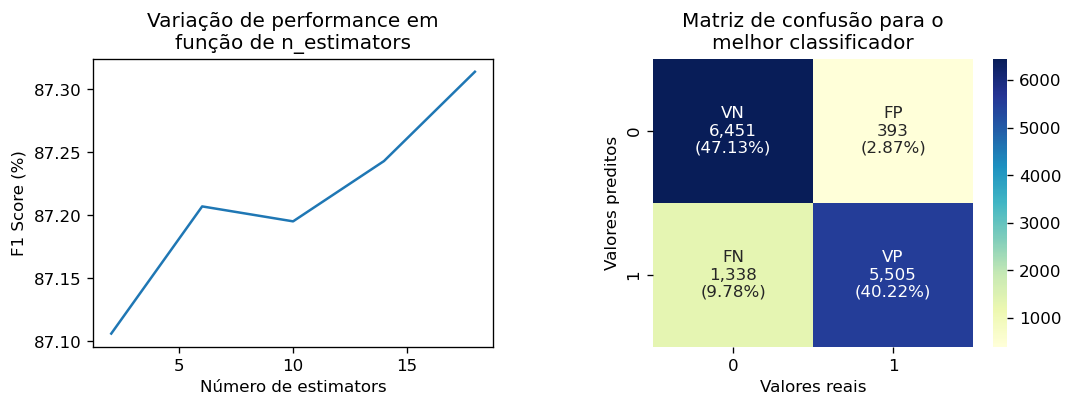

In [62]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
svc_statistics = bagging_satistics(svc_bagging_history, X_test, y_test)

# Análise e comparação entre os três _base\_estimators_

In [22]:
statistics_dict = {
    'KNN': knn_statistics,
    'Árvore de Decisão': dt_statistics,
    'SVC': svc_statistics
}

In [23]:
statistics_dict.items()

dict_items([('KNN', {'Confusion Matrix': array([[6702,  142],
       [2145, 4698]], dtype=int64), 'Accuracy': 83.29071381602981, 'Precision': 97.06611570247934, 'Recall': 68.65409907935116, 'F1 Score': 80.4245484892579}), ('Árvore de Decisão', {'Confusion Matrix': array([[6430,  414],
       [1052, 5791]], dtype=int64), 'Accuracy': 89.28910645137722, 'Precision': 93.3279613215149, 'Recall': 84.62662574894053, 'F1 Score': 88.76456161863887}), ('SVC', {'Confusion Matrix': array([[6451,  393],
       [1338, 5505]], dtype=int64), 'Accuracy': 87.35296266530284, 'Precision': 93.33672431332654, 'Recall': 80.447172292854, 'F1 Score': 86.41393925123614})])

In [63]:
def statistics_comparison(statistics_dict):
    column_list = ['Algorithm', 'Metric', 'Value']
    df_statistics = pd.DataFrame(columns=column_list)
    for method, dict in statistics_dict.items():
        for metric, value in dict.items():
            if metric == 'Confusion Matrix':
                continue
            df_statistics = pd.concat(
                [df_statistics,
                pd.DataFrame(
                    data=[[method, metric, value]],
                    columns=column_list
                )],
                ignore_index=True
            )
    
    sns.barplot(
        data=df_statistics,
        x='Metric',
        y='Value',
        hue='Algorithm',
        palette=sns.color_palette("YlGnBu", 3)
    )

    return df_statistics
 

,Algorithm,Metric,Value
0,KNN,Accuracy,83.290714
1,KNN,Precision,97.066116
2,KNN,Recall,68.654099
3,KNN,F1 Score,80.424548
4,Árvore de Decisão,Accuracy,89.289106
5,Árvore de Decisão,Precision,93.327961
6,Árvore de Decisão,Recall,84.626626
7,Árvore de Decisão,F1 Score,88.764562
8,SVC,Accuracy,87.352963
9,SVC,Precision,93.336724


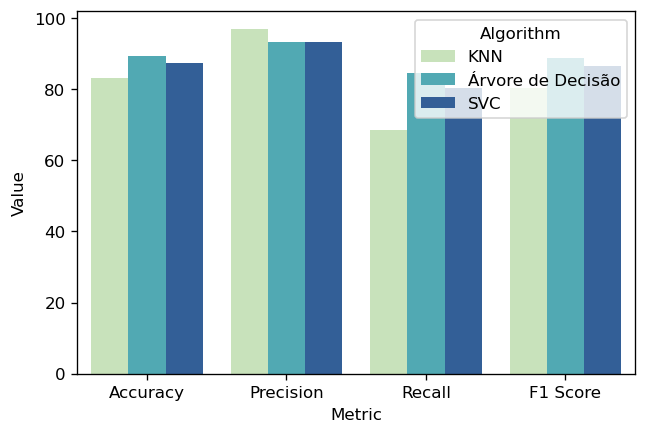

In [64]:
df_comparison = statistics_comparison(statistics_dict)
df_comparison